# Uber Supply-Demand Gap Analysis

This notebook presents an exploratory data analysis (EDA) of Uber ride request data to understand and address the supply-demand gap. The analysis focuses on identifying peak demand periods, cancellation trends, and driver availability issues.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [2]:
df = pd.read_csv("uber_cleaned_data.csv")
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/16 11:51,11/7/16 13:00
1,867,Airport,1.0,Trip Completed,11/7/16 17:57,11/7/16 18:47
2,1807,City,1.0,Trip Completed,12/7/16 9:17,12/7/16 9:58
3,2532,Airport,1.0,Trip Completed,12/7/16 21:08,12/7/16 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
df.info()
df.describe()
df.isnull().sum()

# Convert timestamps to datetime
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')

# Drop rows with null request timestamps
df = df[df['Request timestamp'].notnull()]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


/tmp/ipykernel_6827/1827809986.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
/tmp/ipykernel_6827/1827809986.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')


In [4]:
#5. Feature Engineering (Code)
df['hour'] = df['Request timestamp'].dt.hour
df['day'] = df['Request timestamp'].dt.date
df['weekday'] = df['Request timestamp'].dt.day_name()


6. Demand and Supply Visualization (Code)

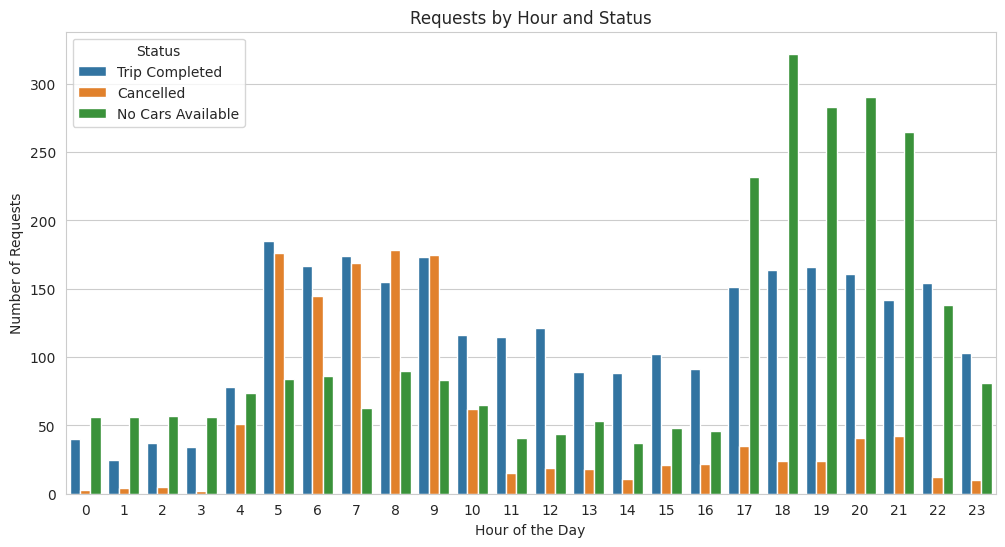

In [5]:
# Requests per hour by status
sns.countplot(data=df, x='hour', hue='Status')
plt.title("Requests by Hour and Status")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Requests")
plt.show()


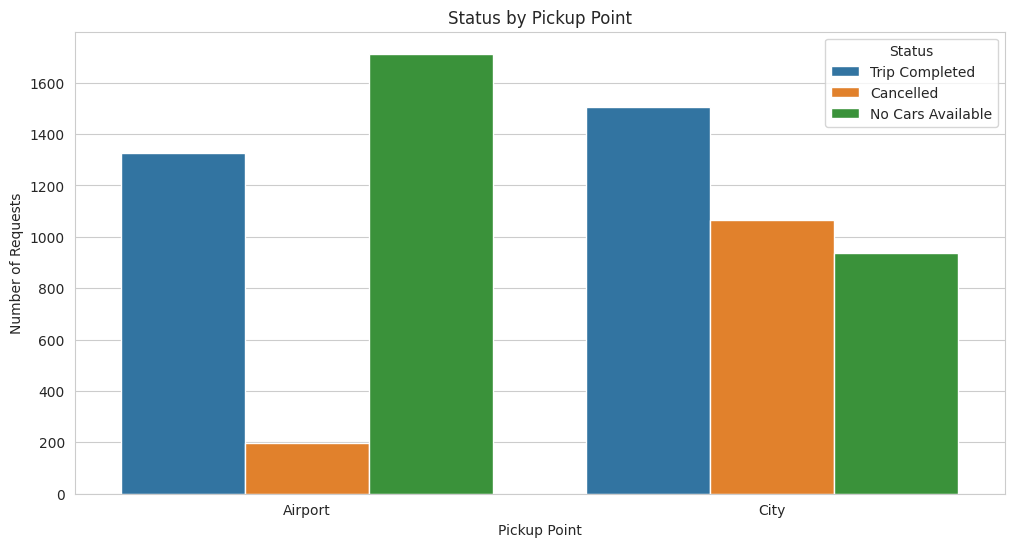

In [6]:
# Status by Pickup Point
sns.countplot(data=df, x='Pickup point', hue='Status')
plt.title("Status by Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.show()


7. Key Observations (Markdown)


## Key Observations

- There is a significant supply-demand gap during **early morning (5–9 AM)** and **night (9 PM–12 AM)**.
- **Cancellations** are most frequent in the **morning hours** from the **City to Airport**.
- **No cars available** is a major issue at night, especially **from Airport to City**.


8. Recommendations (Markdown)

## Recommendations

- Implement **incentives for drivers** during high-demand morning hours.
- Encourage **night shifts** or introduce a **bonus system** for servicing late-night requests from the airport.
- Monitor ride request trends periodically to **adjust driver distribution dynamically**.


9. Conclusion (Markdown)

## Conclusion

The analysis clearly highlights operational inefficiencies leading to unmet rider demand at specific times and routes. Addressing driver availability and incentivizing travel during rush hours can help Uber close the demand-supply gap and improve customer satisfaction.
